1.Task Execution
Data Preparation

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "C:\\Users\\DELL\\Downloads\\spam_ham_dataset.xlsx.csv"
df = pd.read_csv(file_path)

# Data cleaning and preprocessing (assuming 'text' column contains email text)
# You may need to customize this based on your dataset
df.dropna(inplace=True)
X = df['text']
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Build and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



Data Cleaning:


In [24]:
# File path to the CSV fileC:\Users\DELL\Downloads\spam_ham_dataset.xlsx.csv
file_path = r""

# Load CSV file
data = pd.read_csv(file_path)


In [25]:
data


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [26]:
data.isnull().sum()


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [27]:
data.duplicated().sum()


0

In [30]:
data.shape


(5171, 4)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 44s 272ms/step - accuracy: 0.7999 - loss: 0.4001 - val_accuracy: 0.9903 - val_loss: 0.0531
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 212ms/step - accuracy: 0.9904 - loss: 0.0494 - val_accuracy: 0.9894 - val_loss: 0.0344
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.9972 - loss: 0.0234 - val_accuracy: 0.9894 - val_loss: 0.0339
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - accuracy: 0.9970 - loss: 0.0198 - val_accuracy: 0.9884 - val_loss: 0.0279
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 186ms/step - accuracy: 0.9999 - loss: 0.0046 - val_accuracy: 0.9913 - val_loss: 0.0249
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.9999 - loss: 0.0028 - val_accuracy: 0.9932 - val_loss: 0.0251
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9903 - val_loss: 0.0463
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.9989 - loss: 0

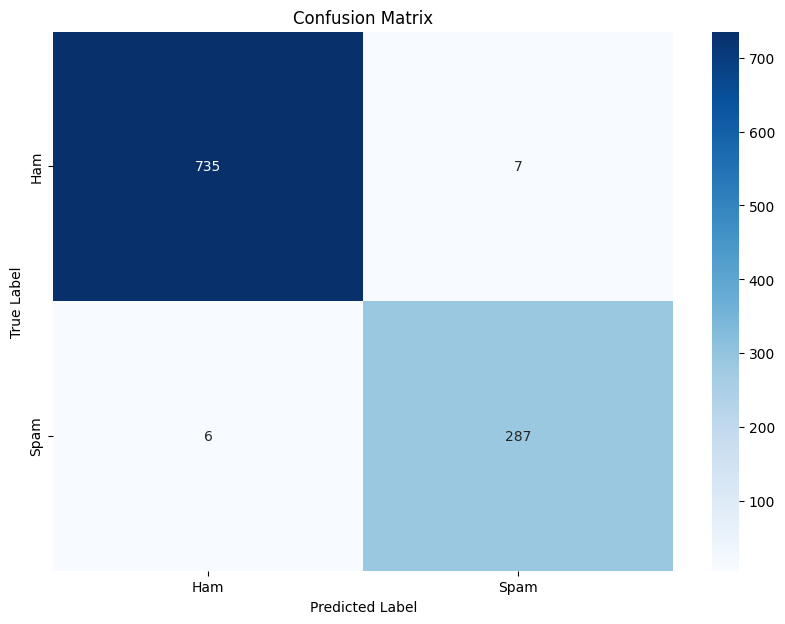

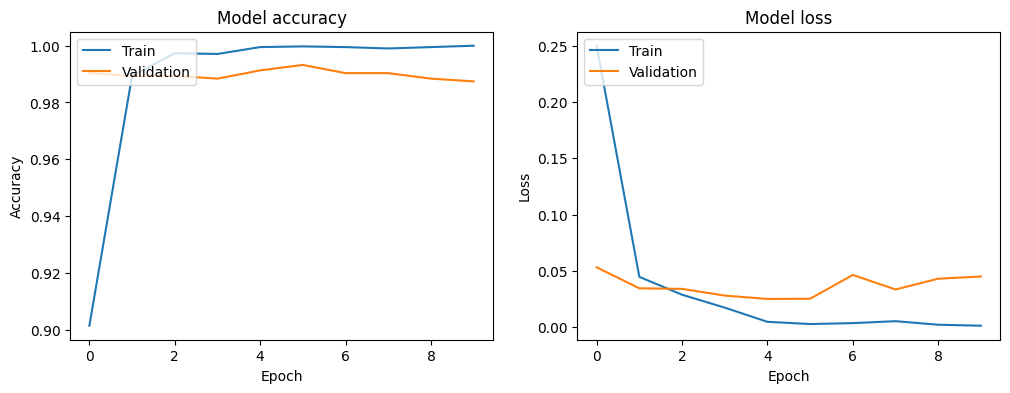

In [2]:
# 1)Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\DELL\Downloads\spam_ham_dataset.xlsx.csv'
df = pd.read_csv(file_path)

# Data cleaning and preprocessing
df.dropna(inplace=True)  # Drop rows with missing values
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df.reset_index(drop=True, inplace=True)

# Assuming 'text' is the column containing the email text and 'label' is the target column
X = df['text']
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Build the TensorFlow model
model = Sequential([
    Dense(128, input_shape=(X_train_vec.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vec, y_train, epochs=10, batch_size=32, validation_data=(X_test_vec, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_vec, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Make predictions on the test set
y_pred_prob = model.predict(X_test_vec)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()
